# Proyek Analisis Data: Bike Sharing
- **Nama:** Alif Restu Putra
- **Email:** alifrestu235@gmail.com
- **ID Dicoding:** alif_restu_putra

# Menentukan Pertanyaan Bisnis :
1. Pada musim apa (spring, summer, fall, winter) sebaiknya perusahaan memaksimalkan promosi penyewaan sepeda untuk meningkatkan jumlah penyewaan?
2. Pada jam berapa penyewaan sepeda tertinggi terjadi, dan bagaimana perusahaan dapat memanfaatkannya untuk mempromosikan layanan tambahan?
3. Bagaimana tingkat penyewaan sepeda berubah sesuai dengan kategori cuaca (cerah, hujan ringan, atau cuaca ekstrem)?
4. Apa yang menyebabkan peningkatan signifikan dalam penyewaan sepeda pada tahun 2012, dan bagaimana tren ini dapat dilanjutkan?

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Data Gethering

In [118]:
data_day = pd.read_csv('https://raw.githubusercontent.com/alifrestu12/note/refs/heads/main/day.csv')
data_hour = pd.read_csv('https://raw.githubusercontent.com/alifrestu12/note/refs/heads/main/hour.csv')

In [119]:
data_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [120]:
data_day["weathersit"].unique()

array([2, 1, 3])

In [121]:
data_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

deskripsi kolom data_day:
1. instant : record index
2. dteday : year-month-day
3. yr : (0:2011 - 1:2012)
4. mnth : month (1 - 12)
5. holiday : holiday (boolean)
6. weekday : day of wwek
7. workingday : working day
8. weathersit : weather status:
                1. Clear, Few clouds, Partly cloudy, Partly cloudy.
                2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
9. temp : suhu aktual
10. atemp : suhu yang dirasakan tubuh akibat kelembapan udara
11. Hum : kelembapan yang dinormalisasi
12. windspeed : Normalized wind speed. The values are divided to 67 (max)
13. kasual : jumlah pengguna biasa
14. registered : jumlah akun yang teregistasi
15. cnt : jumlah total sepeda sewaan. (kasual + registered)

## Assesing Data

### menilai data_day

In [122]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [123]:
print("jumlah duplikasi", data_day.duplicated().sum())

jumlah duplikasi 0


In [124]:
data_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

### menilai data_hour

In [125]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [126]:
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [127]:
print("jumlah duplikasi", data_hour.duplicated().sum())

jumlah duplikasi 0


## Cleaning Data

### cleaning data data_day

In [128]:
date_time = ["dteday"]

for column in date_time:
    data_day[column] = pd.to_datetime(data_day[column])

In [129]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [130]:
data_day.duplicated().sum()

0

In [131]:
data_day.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [132]:
data_day[data_day.yr == data_day.yr.max()]

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
365      366 2012-01-01       1   1     1        0        0           0   
366      367 2012-01-02       1   1     1        1        1           0   
367      368 2012-01-03       1   1     1        0        2           1   
368      369 2012-01-04       1   1     1        0        3           1   
369      370 2012-01-05       1   1     1        0        4           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
365           1  0.370000  0.375621  0.692500   0.192167     686        1608   
366           1  0.273043  0.252304  0.381304   0.329665     244        1707   
367           1  0.150000  0.126275  0.441250   0.365671      89        2147   
368           2  0.107500  0.119337  0.414583   0.184700      95        2273   
369           1  0.265833  0.278412  0.524167   0.129987     140        3132   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
365  2294  
366  1951  
367  2236  
368  2368  
369  3272  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[366 rows x 16 columns]

In [133]:
data_day.yr.replace(data_day.yr.max(),2012, inplace=True)

<ipython-input-133-1b3ddbfe3dab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.yr.replace(data_day.yr.max(),2012, inplace=True)


In [134]:
data_day[data_day.yr == data_day.yr.min()]

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
360      361 2011-12-27       1   0    12        0        2           1   
361      362 2011-12-28       1   0    12        0        3           1   
362      363 2011-12-29       1   0    12        0        4           1   
363      364 2011-12-30       1   0    12        0        5           1   
364      365 2011-12-31       1   0    12        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
360           2  0.325000  0.327633  0.762500   0.188450     103        1059   
361           1  0.299130  0.279974  0.503913   0.293961     255        2047   
362           1  0.248333  0.263892  0.574167   0.119412     254        2169   
363           1  0.311667  0.318812  0.636667   0.134337     491        2508   
364           1  0.410000  0.414121  0.615833   0.220154     665        1820   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
360  1162  
361  2302  
362  2423  
363  2999  
364  2485  

[365 rows x 16 columns]

In [135]:
data_day.yr.replace(data_day.yr.min(),2011, inplace=True)

<ipython-input-135-32a221b4cc50>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.yr.replace(data_day.yr.min(),2011, inplace=True)


In [136]:
data_day.describe()

instant               dteday      season           yr        mnth  \
count  731.000000                  731  731.000000   731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580  2011.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000  2011.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000  2011.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000  2012.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000  2012.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000  2012.000000   12.000000   
std    211.165812                  NaN    1.110807     0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000    0.059130    0.079070   
25%      0.000000    1.000000    0.000000    1.000000    0.337083    0.337842   
50%      0.000000    3.000000    1.000000    1.000000    0.498333    0.486733   
75%      0.000000    5.000000    1.000000    2.000000    0.655417    0.608602   
max      1.000000    6.000000    1.000000    3.000000    0.861667    0.840896   
std      0.167155    2.004787    0.465233    0.544894    0.183051    0.162961   

              hum   windspeed       casual   registered          cnt  
count  731.000000  731.000000   731.000000   731.000000   731.000000  
mean     0.627894    0.190486   848.176471  3656.172367  4504.348837  
min      0.000000    0.022392     2.000000    20.000000    22.000000  
25%      0.520000    0.134950   315.500000  2497.000000  3152.000000  
50%      0.626667    0.180975   713.000000  3662.000000  4548.000000  
75%      0.730209    0.233214  1096.000000  4776.500000  5956.000000  
max      0.972500    0.507463  3410.000000  6946.000000  8714.000000  
std      0.142429    0.077498   686.622488  1560.256377  1937.211452

In [137]:
week_in_day = ["weekday"]

if 0 in data_day.weekday:
    data_day.weekday.replace(0, "minggu", inplace=True)
if 1 in data_day.weekday:
    data_day.weekday.replace(1, "senin", inplace=True)
if 2 in data_day.weekday:
    data_day.weekday.replace(2, "selasa", inplace=True)
if 3 in data_day.weekday:
    data_day.weekday.replace(3, "rabu", inplace=True)
if 4 in data_day.weekday:
    data_day.weekday.replace(4, "kamis", inplace=True)
if 5 in data_day.weekday:
    data_day.weekday.replace(5, "jumat", inplace=True)
if 6 in data_day.weekday:
    data_day.weekday.replace(6, "sabtu", inplace=True)

<ipython-input-137-746fb58575b0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.weekday.replace(0, "minggu", inplace=True)


In [138]:
data_day.head()

instant     dteday  season    yr  mnth  holiday weekday  workingday  \
0        1 2011-01-01       1  2011     1        0   sabtu           0   
1        2 2011-01-02       1  2011     1        0  minggu           0   
2        3 2011-01-03       1  2011     1        0   senin           1   
3        4 2011-01-04       1  2011     1        0  selasa           1   
4        5 2011-01-05       1  2011     1        0    rabu           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [139]:
data_day.describe(include="all")

instant               dteday      season           yr        mnth  \
count   731.000000                  731  731.000000   731.000000  731.000000   
unique         NaN                  NaN         NaN          NaN         NaN   
top            NaN                  NaN         NaN          NaN         NaN   
freq           NaN                  NaN         NaN          NaN         NaN   
mean    366.000000  2012-01-01 00:00:00    2.496580  2011.500684    6.519836   
min       1.000000  2011-01-01 00:00:00    1.000000  2011.000000    1.000000   
25%     183.500000  2011-07-02 12:00:00    2.000000  2011.000000    4.000000   
50%     366.000000  2012-01-01 00:00:00    3.000000  2012.000000    7.000000   
75%     548.500000  2012-07-01 12:00:00    3.000000  2012.000000   10.000000   
max     731.000000  2012-12-31 00:00:00    4.000000  2012.000000   12.000000   
std     211.165812                  NaN    1.110807     0.500342    3.451913   

           holiday weekday  workingday  weathersit        temp       atemp  \
count   731.000000     731  731.000000  731.000000  731.000000  731.000000   
unique         NaN       7         NaN         NaN         NaN         NaN   
top            NaN   sabtu         NaN         NaN         NaN         NaN   
freq           NaN     105         NaN         NaN         NaN         NaN   
mean      0.028728     NaN    0.683995    1.395349    0.495385    0.474354   
min       0.000000     NaN    0.000000    1.000000    0.059130    0.079070   
25%       0.000000     NaN    0.000000    1.000000    0.337083    0.337842   
50%       0.000000     NaN    1.000000    1.000000    0.498333    0.486733   
75%       0.000000     NaN    1.000000    2.000000    0.655417    0.608602   
max       1.000000     NaN    1.000000    3.000000    0.861667    0.840896   
std       0.167155     NaN    0.465233    0.544894    0.183051    0.162961   

               hum   windspeed       casual   registered          cnt  
count   731.000000  731.000000   731.000000   731.000000   731.000000  
unique         NaN         NaN          NaN          NaN          NaN  
top            NaN         NaN          NaN          NaN          NaN  
freq           NaN         NaN          NaN          NaN          NaN  
mean      0.627894    0.190486   848.176471  3656.172367  4504.348837  
min       0.000000    0.022392     2.000000    20.000000    22.000000  
25%       0.520000    0.134950   315.500000  2497.000000  3152.000000  
50%       0.626667    0.180975   713.000000  3662.000000  4548.000000  
75%       0.730209    0.233214  1096.000000  4776.500000  5956.000000  
max       0.972500    0.507463  3410.000000  6946.000000  8714.000000  
std       0.142429    0.077498   686.622488  1560.256377  1937.211452

In [140]:
season_data_day = ["season"]

if 1 in data_day.season:
    data_day.season.replace(1, "spring", inplace=True)
if 2 in data_day.season:
    data_day.season.replace(2, "summer", inplace=True)
if 3 in data_day.season:
    data_day.season.replace(3, "fall", inplace=True)
if 4 in data_day.season:
    data_day.season.replace(4, "winter", inplace=True)

<ipython-input-140-b3f40b8d7371>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.season.replace(1, "spring", inplace=True)


In [141]:
hari_data_day = ["weekday"]

for index in data_day.index:
    if data_day.loc[index, "weekday"] in ["sabtu", "minggu"]:
        data_day.loc[index, "holiday"] = 1

### cleaning data data_hour

In [142]:
date_hour = ["dteday"]

for column in date_hour:
    data_hour[column] = pd.to_datetime(data_hour[column])

In [143]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [144]:
data_hour[data_hour.yr == data_hour.yr.max()]

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
8645      8646 2012-01-01       1   1     1   0        0        0           0   
8646      8647 2012-01-01       1   1     1   1        0        0           0   
8647      8648 2012-01-01       1   1     1   2        0        0           0   
8648      8649 2012-01-01       1   1     1   3        0        0           0   
8649      8650 2012-01-01       1   1     1   4        0        0           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
8645            1  0.36  0.3788  0.66     0.0000       5          43   48  
8646            1  0.36  0.3485  0.66     0.1343      15          78   93  
8647            1  0.32  0.3485  0.76     0.0000      16          59   75  
8648            1  0.30  0.3333  0.81     0.0000      11          41   52  
8649            1  0.28  0.3030  0.81     0.0896       0           8    8  
...           ...   ...     ...   ...        ...     ...         ...  ...  
17374           2  0.26  0.2576  0.60     0.1642      11         108  119  
17375           2  0.26  0.2576  0.60     0.1642       8          81   89  
17376           1  0.26  0.2576  0.60     0.1642       7          83   90  
17377           1  0.26  0.2727  0.56     0.1343      13          48   61  
17378           1  0.26  0.2727  0.65     0.1343      12          37   49  

[8734 rows x 17 columns]

In [145]:
data_hour.yr.replace(data_hour.yr.max(),2012, inplace=True)

<ipython-input-145-7f0dd088bdcf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_hour.yr.replace(data_hour.yr.max(),2012, inplace=True)


In [146]:
data_hour[data_hour.yr == data_hour.yr.min()]

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0           1 2011-01-01       1   0     1   0        0        6           0   
1           2 2011-01-01       1   0     1   1        0        6           0   
2           3 2011-01-01       1   0     1   2        0        6           0   
3           4 2011-01-01       1   0     1   3        0        6           0   
4           5 2011-01-01       1   0     1   4        0        6           0   
...       ...        ...     ...  ..   ...  ..      ...      ...         ...   
8640     8641 2011-12-31       1   0    12  19        0        6           0   
8641     8642 2011-12-31       1   0    12  20        0        6           0   
8642     8643 2011-12-31       1   0    12  21        0        6           0   
8643     8644 2011-12-31       1   0    12  22        0        6           0   
8644     8645 2011-12-31       1   0    12  23        0        6           0   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0              1  0.24  0.2879  0.81     0.0000       3          13   16  
1              1  0.22  0.2727  0.80     0.0000       8          32   40  
2              1  0.22  0.2727  0.80     0.0000       5          27   32  
3              1  0.24  0.2879  0.75     0.0000       3          10   13  
4              1  0.24  0.2879  0.75     0.0000       0           1    1  
...          ...   ...     ...   ...        ...     ...         ...  ...  
8640           1  0.42  0.4242  0.54     0.2239      19          73   92  
8641           1  0.42  0.4242  0.54     0.2239       8          63   71  
8642           1  0.40  0.4091  0.58     0.1940       2          50   52  
8643           1  0.38  0.3939  0.62     0.1343       2          36   38  
8644           1  0.36  0.3788  0.66     0.0000       4          27   31  

[8645 rows x 17 columns]

In [147]:
data_hour.yr.replace(data_hour.yr.min(),2011, inplace=True)

<ipython-input-147-ec94fa2d4522>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_hour.yr.replace(data_hour.yr.min(),2011, inplace=True)


In [148]:
data_hour.describe()

instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640   2011.502561   
min        1.0000            2011-01-01 00:00:00      1.000000   2011.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000   2011.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000   2012.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000   2012.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000   2012.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      6.000000      0.000000      1.000000      0.000000   
50%        7.000000     12.000000      0.000000      3.000000      1.000000   
75%       10.000000     18.000000      0.000000      5.000000      1.000000   
max       12.000000     23.000000      1.000000      6.000000      1.000000   
std        3.438776      6.914405      0.167165      2.005771      0.465431   

         weathersit          temp         atemp           hum     windspeed  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       1.425283      0.496987      0.475775      0.627229      0.190098   
min        1.000000      0.020000      0.000000      0.000000      0.000000   
25%        1.000000      0.340000      0.333300      0.480000      0.104500   
50%        1.000000      0.500000      0.484800      0.630000      0.194000   
75%        2.000000      0.660000      0.621200      0.780000      0.253700   
max        4.000000      1.000000      1.000000      1.000000      0.850700   
std        0.639357      0.192556      0.171850      0.192930      0.122340   

             casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  
mean      35.676218    153.786869    189.463088  
min        0.000000      0.000000      1.000000  
25%        4.000000     34.000000     40.000000  
50%       17.000000    115.000000    142.000000  
75%       48.000000    220.000000    281.000000  
max      367.000000    886.000000    977.000000  
std       49.305030    151.357286    181.387599

In [149]:
week_in_day = ["weekday"]

if 0 in data_hour.weekday:
    data_hour.weekday.replace(0, "minggu", inplace=True)
if 1 in data_hour.weekday:
    data_hour.weekday.replace(1, "senin", inplace=True)
if 2 in data_hour.weekday:
    data_hour.weekday.replace(2, "selasa", inplace=True)
if 3 in data_hour.weekday:
    data_hour.weekday.replace(3, "rabu", inplace=True)
if 4 in data_hour.weekday:
    data_hour.weekday.replace(4, "kamis", inplace=True)
if 5 in data_hour.weekday:
    data_hour.weekday.replace(5, "jumat", inplace=True)
if 6 in data_hour.weekday:
    data_hour.weekday.replace(6, "sabtu", inplace=True)

<ipython-input-149-daa3c84f0a97>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_hour.weekday.replace(0, "minggu", inplace=True)


In [150]:
data_hour.head()

instant     dteday  season    yr  mnth  hr  holiday weekday  workingday  \
0        1 2011-01-01       1  2011     1   0        0   sabtu           0   
1        2 2011-01-01       1  2011     1   1        0   sabtu           0   
2        3 2011-01-01       1  2011     1   2        0   sabtu           0   
3        4 2011-01-01       1  2011     1   3        0   sabtu           0   
4        5 2011-01-01       1  2011     1   4        0   sabtu           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [151]:
season_data_hour = ["season"]

if 1 in data_hour.season:
    data_hour.season.replace(1, "spring", inplace=True)
if 2 in data_hour.season:
    data_hour.season.replace(2, "summer", inplace=True)
if 3 in data_hour.season:
    data_hour.season.replace(3, "fall", inplace=True)
if 4 in data_hour.season:
    data_hour.season.replace(4, "winter", inplace=True)

<ipython-input-151-b7c6f00eb8d5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_hour.season.replace(1, "spring", inplace=True)


In [152]:
hari_data_hour = ["weekday"]

for index in data_hour.index:
    if data_hour.loc[index, "weekday"] in ["sabtu", "minggu"]:
        data_hour.loc[index, "holiday"] = 1

In [153]:
data_hour.sample(10)

instant     dteday  season    yr  mnth  hr  holiday weekday  \
6152      6153 2011-09-18    fall  2011     9  22        1  minggu   
15778    15779 2012-10-24  winter  2012    10  15        0    rabu   
16082    16083 2012-11-07  winter  2012    11  19        0    rabu   
3431      3432 2011-05-27  summer  2011     5  21        0   jumat   
4559      4560 2011-07-13    fall  2011     7  21        0    rabu   
15895    15896 2012-10-31  winter  2012    10   0        0    rabu   
13008    13009 2012-07-01    fall  2012     7   5        1  minggu   
11711    11712 2012-05-08  summer  2012     5   4        0  selasa   
15238    15239 2012-10-02  winter  2012    10   3        0  selasa   
981        982 2011-02-13  spring  2011     2  13        1  minggu   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
6152            0           2  0.54  0.5152  0.68     0.0896       9   
15778           1           1  0.70  0.6364  0.39     0.1045      63   
16082           1           2  0.30  0.2727  0.56     0.2985      17   
3431            1           1  0.60  0.5606  0.83     0.1045      37   
4559            1           1  0.70  0.6667  0.79     0.1045      56   
15895           1           2  0.30  0.3182  0.81     0.1045       0   
13008           0           1  0.68  0.6364  0.79     0.1045       3   
11711           1           2  0.52  0.5000  0.68     0.3284       0   
15238           1           2  0.54  0.5152  0.88     0.1940       1   
981             0           1  0.38  0.3939  0.29     0.3582      62   

       registered  cnt  
6152           75   84  
15778         245  308  
16082         302  319  
3431          114  151  
4559          194  250  
15895          16   16  
13008           7   10  
11711           5    5  
15238           4    5  
981            92  154

# Exploratory Data Analysis

## Explore data_hour

In [154]:
data_hour['cnt'] = data_hour['casual'] + data_hour['registered']

In [155]:
data_hour.describe(include="all")

instant                         dteday season            yr  \
count   17379.0000                          17379  17379  17379.000000   
unique         NaN                            NaN      4           NaN   
top            NaN                            NaN   fall           NaN   
freq           NaN                            NaN   4496           NaN   
mean     8690.0000  2012-01-02 04:08:34.552045568    NaN   2011.502561   
min         1.0000            2011-01-01 00:00:00    NaN   2011.000000   
25%      4345.5000            2011-07-04 00:00:00    NaN   2011.000000   
50%      8690.0000            2012-01-02 00:00:00    NaN   2012.000000   
75%     13034.5000            2012-07-02 00:00:00    NaN   2012.000000   
max     17379.0000            2012-12-31 00:00:00    NaN   2012.000000   
std      5017.0295                            NaN    NaN      0.500008   

                mnth            hr       holiday weekday    workingday  \
count   17379.000000  17379.000000  17379.000000   17379  17379.000000   
unique           NaN           NaN           NaN       7           NaN   
top              NaN           NaN           NaN   sabtu           NaN   
freq             NaN           NaN           NaN    2512           NaN   
mean        6.537775     11.546752      0.317279     NaN      0.682721   
min         1.000000      0.000000      0.000000     NaN      0.000000   
25%         4.000000      6.000000      0.000000     NaN      0.000000   
50%         7.000000     12.000000      0.000000     NaN      1.000000   
75%        10.000000     18.000000      1.000000     NaN      1.000000   
max        12.000000     23.000000      1.000000     NaN      1.000000   
std         3.438776      6.914405      0.465431     NaN      0.465431   

          weathersit          temp         atemp           hum     windspeed  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        1.425283      0.496987      0.475775      0.627229      0.190098   
min         1.000000      0.020000      0.000000      0.000000      0.000000   
25%         1.000000      0.340000      0.333300      0.480000      0.104500   
50%         1.000000      0.500000      0.484800      0.630000      0.194000   
75%         2.000000      0.660000      0.621200      0.780000      0.253700   
max         4.000000      1.000000      1.000000      1.000000      0.850700   
std         0.639357      0.192556      0.171850      0.192930      0.122340   

              casual    registered           cnt  
count   17379.000000  17379.000000  17379.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean       35.676218    153.786869    189.463088  
min         0.000000      0.000000      1.000000  
25%         4.000000     34.000000     40.000000  
50%        17.000000    115.000000    142.000000  
75%        48.000000    220.000000    281.000000  
max       367.000000    886.000000    977.000000  
std        49.305030    151.357286    181.387599

In [156]:
data_hour.head(24)

instant     dteday  season    yr  mnth  hr  holiday weekday  workingday  \
0         1 2011-01-01  spring  2011     1   0        1   sabtu           0   
1         2 2011-01-01  spring  2011     1   1        1   sabtu           0   
2         3 2011-01-01  spring  2011     1   2        1   sabtu           0   
3         4 2011-01-01  spring  2011     1   3        1   sabtu           0   
4         5 2011-01-01  spring  2011     1   4        1   sabtu           0   
5         6 2011-01-01  spring  2011     1   5        1   sabtu           0   
6         7 2011-01-01  spring  2011     1   6        1   sabtu           0   
7         8 2011-01-01  spring  2011     1   7        1   sabtu           0   
8         9 2011-01-01  spring  2011     1   8        1   sabtu           0   
9        10 2011-01-01  spring  2011     1   9        1   sabtu           0   
10       11 2011-01-01  spring  2011     1  10        1   sabtu           0   
11       12 2011-01-01  spring  2011     1  11        1   sabtu           0   
12       13 2011-01-01  spring  2011     1  12        1   sabtu           0   
13       14 2011-01-01  spring  2011     1  13        1   sabtu           0   
14       15 2011-01-01  spring  2011     1  14        1   sabtu           0   
15       16 2011-01-01  spring  2011     1  15        1   sabtu           0   
16       17 2011-01-01  spring  2011     1  16        1   sabtu           0   
17       18 2011-01-01  spring  2011     1  17        1   sabtu           0   
18       19 2011-01-01  spring  2011     1  18        1   sabtu           0   
19       20 2011-01-01  spring  2011     1  19        1   sabtu           0   
20       21 2011-01-01  spring  2011     1  20        1   sabtu           0   
21       22 2011-01-01  spring  2011     1  21        1   sabtu           0   
22       23 2011-01-01  spring  2011     1  22        1   sabtu           0   
23       24 2011-01-01  spring  2011     1  23        1   sabtu           0   

    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0            1  0.24  0.2879  0.81     0.0000       3          13   16  
1            1  0.22  0.2727  0.80     0.0000       8          32   40  
2            1  0.22  0.2727  0.80     0.0000       5          27   32  
3            1  0.24  0.2879  0.75     0.0000       3          10   13  
4            1  0.24  0.2879  0.75     0.0000       0           1    1  
5            2  0.24  0.2576  0.75     0.0896       0           1    1  
6            1  0.22  0.2727  0.80     0.0000       2           0    2  
7            1  0.20  0.2576  0.86     0.0000       1           2    3  
8            1  0.24  0.2879  0.75     0.0000       1           7    8  
9            1  0.32  0.3485  0.76     0.0000       8           6   14  
10           1  0.38  0.3939  0.76     0.2537      12          24   36  
11           1  0.36  0.3333  0.81     0.2836      26          30   56  
12           1  0.42  0.4242  0.77     0.2836      29          55   84  
13           2  0.46  0.4545  0.72     0.2985      47          47   94  
14           2  0.46  0.4545  0.72     0.2836      35          71  106  
15           2  0.44  0.4394  0.77     0.2985      40          70  110  
16           2  0.42  0.4242  0.82     0.2985      41          52   93  
17           2  0.44  0.4394  0.82     0.2836      15          52   67  
18           3  0.42  0.4242  0.88     0.2537       9          26   35  
19           3  0.42  0.4242  0.88     0.2537       6          31   37  
20           2  0.40  0.4091  0.87     0.2537      11          25   36  
21           2  0.40  0.4091  0.87     0.1940       3          31   34  
22           2  0.40  0.4091  0.94     0.2239      11          17   28  
23           2  0.46  0.4545  0.88     0.2985      15          24   39

In [157]:
data_hour.instant.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: instant, Length: 17379, dtype: bool

In [158]:
data_hour["atemp_celcius"] = data_hour["atemp"]*66-16
data_hour["atemp_celcius"].describe()

count    17379.000000
mean        15.401157
std         11.342114
min        -16.000000
25%          5.997800
50%         15.996800
75%         24.999200
max         50.000000
Name: atemp_celcius, dtype: float64

In [159]:
data_hour["temp_celcius"] = data_hour["temp"]*47-8
data_hour.sample(6)

instant     dteday  season    yr  mnth  hr  holiday weekday  \
12429    12430 2012-06-07  summer  2012     6   2        0   kamis   
6946      6947 2011-10-22  winter  2011    10   1        1   sabtu   
4727      4728 2011-07-20    fall  2011     7  21        0    rabu   
1888      1889 2011-03-24  summer  2011     3  11        0   kamis   
11880    11881 2012-05-15  summer  2012     5   5        0  selasa   
4609      4610 2011-07-15    fall  2011     7  23        0   jumat   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
12429           1           1  0.52  0.5000  0.77     0.0896       0   
6946            0           1  0.40  0.4091  0.62     0.1940      20   
4727            1           1  0.80  0.8030  0.66     0.1642      33   
1888            1           2  0.30  0.2727  0.81     0.2985      10   
11880           1           3  0.56  0.5303  0.94     0.2239       0   
4609            1           1  0.64  0.6212  0.61     0.1642      41   

       registered  cnt  atemp_celcius  temp_celcius  
12429          12   12        17.0000         16.44  
6946           50   70        11.0006         10.80  
4727          209  242        36.9980         29.60  
1888           61   71         1.9982          6.10  
11880           8    8        18.9998         18.32  
4609          126  167        24.9992         22.08

In [160]:
data_hour.describe(include="all")

instant                         dteday season            yr  \
count   17379.0000                          17379  17379  17379.000000   
unique         NaN                            NaN      4           NaN   
top            NaN                            NaN   fall           NaN   
freq           NaN                            NaN   4496           NaN   
mean     8690.0000  2012-01-02 04:08:34.552045568    NaN   2011.502561   
min         1.0000            2011-01-01 00:00:00    NaN   2011.000000   
25%      4345.5000            2011-07-04 00:00:00    NaN   2011.000000   
50%      8690.0000            2012-01-02 00:00:00    NaN   2012.000000   
75%     13034.5000            2012-07-02 00:00:00    NaN   2012.000000   
max     17379.0000            2012-12-31 00:00:00    NaN   2012.000000   
std      5017.0295                            NaN    NaN      0.500008   

                mnth            hr       holiday weekday    workingday  \
count   17379.000000  17379.000000  17379.000000   17379  17379.000000   
unique           NaN           NaN           NaN       7           NaN   
top              NaN           NaN           NaN   sabtu           NaN   
freq             NaN           NaN           NaN    2512           NaN   
mean        6.537775     11.546752      0.317279     NaN      0.682721   
min         1.000000      0.000000      0.000000     NaN      0.000000   
25%         4.000000      6.000000      0.000000     NaN      0.000000   
50%         7.000000     12.000000      0.000000     NaN      1.000000   
75%        10.000000     18.000000      1.000000     NaN      1.000000   
max        12.000000     23.000000      1.000000     NaN      1.000000   
std         3.438776      6.914405      0.465431     NaN      0.465431   

          weathersit          temp         atemp           hum     windspeed  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        1.425283      0.496987      0.475775      0.627229      0.190098   
min         1.000000      0.020000      0.000000      0.000000      0.000000   
25%         1.000000      0.340000      0.333300      0.480000      0.104500   
50%         1.000000      0.500000      0.484800      0.630000      0.194000   
75%         2.000000      0.660000      0.621200      0.780000      0.253700   
max         4.000000      1.000000      1.000000      1.000000      0.850700   
std         0.639357      0.192556      0.171850      0.192930      0.122340   

              casual    registered           cnt  atemp_celcius  temp_celcius  
count   17379.000000  17379.000000  17379.000000   17379.000000  17379.000000  
unique           NaN           NaN           NaN            NaN           NaN  
top              NaN           NaN           NaN            NaN           NaN  
freq             NaN           NaN           NaN            NaN           NaN  
mean       35.676218    153.786869    189.463088      15.401157     15.358397  
min         0.000000      0.000000      1.000000     -16.000000     -7.060000  
25%         4.000000     34.000000     40.000000       5.997800      7.980000  
50%        17.000000    115.000000    142.000000      15.996800     15.500000  
75%        48.000000    220.000000    281.000000      24.999200     23.020000  
max       367.000000    886.000000    977.000000      50.000000     39.000000  
std        49.305030    151.357286    181.387599      11.342114      9.050138

In [161]:
total_rentals_by_date = data_hour.groupby('dteday')['cnt'].sum()
print(total_rentals_by_date)

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64


In [162]:
pd.qcut(data_hour["temp_celcius"],3).value_counts()

temp_celcius
(9.86, 21.14]     6457
(-7.061, 9.86]    5813
(21.14, 39.0]     5109
Name: count, dtype: int64

In [163]:
data_hour["temperature status"] = np.where(data_hour["temp_celcius"]<=10, 'could', 'normal')
data_hour["temperature status"] = np.where(data_hour["temp_celcius"]>=25, 'hot', data_hour["temperature status"])

In [164]:
data_hour.sample(10)

instant     dteday  season    yr  mnth  hr  holiday weekday  \
44          45 2011-01-02  spring  2011     1  21        1  minggu   
7013      7014 2011-10-24  winter  2011    10  20        0   senin   
15406    15407 2012-10-09  winter  2012    10   3        0  selasa   
4255      4256 2011-07-01    fall  2011     7   5        0   jumat   
8906      8907 2012-01-11  spring  2012     1  23        0    rabu   
1081      1082 2011-02-17  spring  2011     2  19        0   kamis   
4378      4379 2011-07-06    fall  2011     7   8        0    rabu   
13745    13746 2012-07-31    fall  2012     7  22        0  selasa   
7823      7824 2011-11-27  winter  2011    11  14        1  minggu   
14972    14973 2012-09-21    fall  2012     9   1        0   jumat   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
44              0           1  0.26  0.2273  0.44     0.3284      11   
7013            1           1  0.48  0.4697  0.82     0.1045      11   
15406           1           3  0.36  0.3333  0.87     0.2836       0   
4255            1           1  0.60  0.6061  0.64     0.1343       3   
8906            1           3  0.34  0.3182  0.87     0.2239       0   
1081            1           1  0.48  0.4697  0.55     0.3284      14   
4378            1           2  0.72  0.6970  0.74     0.1045      31   
13745           1           1  0.68  0.6364  0.74     0.2537      33   
7823            0           1  0.62  0.6212  0.43     0.4627     113   
14972           1           1  0.52  0.5000  0.72     0.0000      11   

       registered  cnt  atemp_celcius  temp_celcius temperature status  
44             20   31        -0.9982          4.22              could  
7013          118  129        15.0002         14.56             normal  
15406           3    3         5.9978          8.92              could  
4255           27   30        24.0026         20.20             normal  
8906            9    9         5.0012          7.98              could  
1081          161  175        15.0002         14.56             normal  
4378          397  428        30.0020         25.84                hot  
13745         224  257        26.0024         23.96             normal  
7823          200  313        24.9992         21.14             normal  
14972          38   49        17.0000         16.44             normal

In [165]:
data_hour.groupby(by=["season"]).agg({
    "cnt" : "sum",
    "weathersit" : ['mean','max','min'],
    "temp_celcius" : ["mean","max","min"],
    "atemp_celcius" : ["mean","max","min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt weathersit         temp_celcius              atemp_celcius  \
            sum       mean max min         mean    max   min          mean   
season                                                                       
fall    1061129   1.330294   3   1    25.201277  39.00  9.86     27.296232   
summer   918589   1.443638   3   1    17.599170  36.18 -0.48     18.356099   
winter   841613   1.472117   3   1    11.887486  27.72 -1.42     11.438691   
spring   471348   1.460160   4   1     6.059892  25.84 -7.06      3.675688   

                          
            max      min  
season                    
fall    50.0000  -0.0016  
summer  42.0008  -4.9978  
winter  28.9988  -6.0010  
spring  26.9990 -16.0000

In [166]:
data_hour.groupby(by=["season","mnth"]).agg({
    "cnt" : "sum",
    "registered" : "sum",
    "casual" : "sum"
}).sort_values(by=("cnt"), ascending=False)

cnt  registered  casual
season mnth                            
fall   8     351194      279155   72039
       7     344948      266791   78157
summer 5     331686      256401   75285
winter 10    322352      262592   59760
summer 4     269094      208292   60802
winter 11    254831      218228   36603
fall   9     249599      197465   52134
summer 6     230954      180809   50145
winter 12    168038      152808   15230
spring 2     151352      136389   14963
       3     142065      114911   27154
       1     134933      122891   12042
fall   6     115388       91627   23761
winter 9      96392       78203   18189
summer 3      86855       69565   17290
spring 12     42998       36535    6463

In [167]:
data_hour.groupby(by='weathersit').agg({
    'cnt' : 'sum',
    'temp_celcius' : ['mean', 'max', 'min'],
    'atemp_celcius' : ['mean', 'max', 'min']
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt temp_celcius              atemp_celcius                  
                sum         mean    max   min          mean      max      min
weathersit                                                                   
1           2338173    16.019541  39.00 -7.06     16.233511  50.0000 -16.0000
2            795952    14.298935  37.12 -7.06     14.134978  42.9974 -16.0000
3            158331    13.464327  35.24 -4.24     12.801479  42.9974 -12.9970
4               223     0.773333   2.34 -1.42     -3.664600  -0.9982  -6.9976

In [168]:
data_hour.groupby(by='season').agg({
    'cnt' : 'sum',
    'weathersit' : ['mean','min','max']
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt weathersit        
            sum       mean min max
season                            
fall    1061129   1.330294   1   3
summer   918589   1.443638   1   3
winter   841613   1.472117   1   3
spring   471348   1.460160   1   4

In [169]:
data_hour.groupby(by='hr').agg({
    'cnt' : 'sum',
    'temp_celcius' : ['mean','min','max'],
    'atemp_celcius' : ['mean','min','max']
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt temp_celcius              atemp_celcius                  
       sum         mean   min    max          mean      min      max
hr                                                                  
17  336860    18.065041 -2.36  38.06     18.532800  -8.9974  44.9972
18  309772    17.435522 -4.24  37.12     17.840584 -10.0006  42.9974
8   261001    13.384677 -7.06  31.48     13.057939 -16.0000  40.0010
16  227748    18.553068 -2.36  39.00     19.142333 -10.0006  44.9972
19  226789    16.636264 -4.24  35.24     16.964271 -10.0006  44.9972
13  184919    18.072428 -4.24  37.12     18.682946  -8.9974  48.9968
12  184414    17.392912 -5.18  37.12     17.851627 -10.9972  46.9970
15  183149    18.724883 -2.36  37.12     19.415455  -8.0008  48.9968
14  175652    18.558546 -3.30  37.12     19.256403  -8.0008  50.0000
20  164550    15.904148 -5.18  35.24     16.156614 -10.9972  42.9974
9   159438    14.406135 -6.12  32.42     14.275180 -14.0002  42.9974
7   154171    12.637331 -7.06  29.60     12.086731 -14.9968  36.9980
11  151320    16.562834 -5.18  36.18     16.833493 -10.9972  42.9974
10  126257    15.527153 -6.12  35.24     15.557142 -12.0004  44.9972
21  125445    15.279203 -5.18  33.36     15.449209 -10.9972  42.9974
22   95612    14.771758 -5.18  31.48     14.791312 -14.0002  40.9976
23   63941    14.326291 -6.12  31.48     14.233702 -12.9970  38.9978
6    55132    12.326041 -7.06  29.60     11.678789 -14.0002  36.0014
0    39130    13.968292 -6.12  30.54     13.772909 -14.0002  38.9978
1    24164    13.590138 -6.12  30.54     13.257080 -16.0000  36.0014
2    16352    13.364951 -7.06  30.54     12.986175 -14.9968  36.9980
5    14261    12.497768 -7.06  28.66     11.927601 -12.9970  34.0016
3     8174    13.296327 -7.06  29.60     12.934125 -14.9968  36.0014
4     4428    12.991535 -7.06  28.66     12.548267 -14.9968  34.0016

In [170]:
data_hour.groupby(by=['weathersit','hr']).agg({
    'cnt' : 'sum',
    'temp_celcius' : ['mean','min','max'],
    'atemp_celcius' : ['mean','min','max']
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt temp_celcius              atemp_celcius           \
                  sum         mean   min    max          mean      min   
weathersit hr                                                            
1          17  253718    19.226627 -2.36  38.06     19.921014  -8.9974   
           18  229220    18.417760 -4.24  37.12     19.049920 -10.0006   
           16  171230    19.824000 -2.36  39.00     20.688106 -10.0006   
           19  171073    17.400314 -4.24  35.24     17.982311 -10.0006   
           8   158998    13.327318 -7.06  31.48     12.952490 -16.0000   
...               ...          ...   ...    ...           ...      ...   
3          3      375    13.062963 -1.42  25.84     12.352011  -4.0012   
           4      267    12.745965 -0.48  24.90     11.842389  -6.9976   
4          18     164     1.400000  1.40   1.40     -0.998200  -0.9982   
           16      36     2.340000  2.34   2.34     -2.998000  -2.9980   
           1       23    -1.420000 -1.42  -1.42     -6.997600  -6.9976   

                        
                   max  
weathersit hr           
1          17  44.9972  
           18  42.9974  
           16  44.9972  
           19  44.9972  
           8   38.9978  
...                ...  
3          3   30.0020  
           4   28.0022  
4          18  -0.9982  
           16  -2.9980  
           1   -6.9976  

[75 rows x 7 columns]

In [171]:
data_hour.groupby(by=['weathersit', 'temperature status']).agg({
    'cnt' : 'sum',
}).sort_values(by=['cnt'], ascending=False)

cnt
weathersit temperature status         
1          normal              1230132
           hot                  705612
2          normal               473686
1          could                402429
2          could                190329
           hot                  131937
3          normal               104924
           could                 33103
           hot                   20304
4          could                   223

In [172]:
data_hour.groupby(by=["yr","weathersit"]).agg({
    "instant" : 'nunique',
})

instant
yr   weathersit         
2011 1              5645
     2              2218
     3               781
     4                 1
2012 1              5768
     2              2326
     3               638
     4                 2

insight data:
* kita melihat bahwasanya sewa sepeda tertinggi terjadi ketika cuaca sedang cerah dan didukung dengan pada waktu yang produktif yaitu pada jam 17.00 - 18.00
* musim yang paling banyak terjadinya sewa sepeda adalah pada musim gugur hal tersebut juga di dukung dengan rata-rata cuaca yang baik
* jumlah sewa sepeda paling sedikit yaitu terjadi ketika kondisi cuaca sangat buruk dikarenakan mengendarai sepeda saat cuaca buruk sangat berisiko

## Explore data_day

In [173]:
data_day.tail()

instant     dteday  season    yr  mnth  holiday weekday  workingday  \
726      727 2012-12-27  spring  2012    12        0   kamis           1   
727      728 2012-12-28  spring  2012    12        0   jumat           1   
728      729 2012-12-29  spring  2012    12        1   sabtu           0   
729      730 2012-12-30  spring  2012    12        1  minggu           0   
730      731 2012-12-31  spring  2012    12        0   senin           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [174]:
data_day.head()

instant     dteday  season    yr  mnth  holiday weekday  workingday  \
0        1 2011-01-01  spring  2011     1        1   sabtu           0   
1        2 2011-01-02  spring  2011     1        1  minggu           0   
2        3 2011-01-03  spring  2011     1        0   senin           1   
3        4 2011-01-04  spring  2011     1        0  selasa           1   
4        5 2011-01-05  spring  2011     1        0    rabu           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [175]:
data_day["atemp_celcius"] = data_day["atemp"]*66-16
data_day["atemp_celcius"].describe()

count    731.000000
mean      15.307363
std       10.755438
min      -10.781406
25%        6.297605
50%       16.124378
75%       24.167732
max       39.499136
Name: atemp_celcius, dtype: float64

In [176]:
data_day["temp_celcius"] = data_day["temp"]*47-8
data_day["temp_celcius"].describe()

count    731.000000
mean      15.283085
std        8.603397
min       -5.220871
25%        7.842925
50%       15.421651
75%       22.804575
max       32.498349
Name: temp_celcius, dtype: float64

In [177]:
data_day["temperature status"] = np.where(data_day["temp_celcius"]<=10, 'could', 'normal')
data_day["temperature status"] = np.where(data_day["temp_celcius"]>=25, 'hot', data_day["temperature status"])

In [178]:
data_day["cnt"] = data_day["casual"] + data_day["registered"]

In [179]:
data_day.describe(include="all")

instant               dteday season           yr        mnth  \
count   731.000000                  731    731   731.000000  731.000000   
unique         NaN                  NaN      4          NaN         NaN   
top            NaN                  NaN   fall          NaN         NaN   
freq           NaN                  NaN    188          NaN         NaN   
mean    366.000000  2012-01-01 00:00:00    NaN  2011.500684    6.519836   
min       1.000000  2011-01-01 00:00:00    NaN  2011.000000    1.000000   
25%     183.500000  2011-07-02 12:00:00    NaN  2011.000000    4.000000   
50%     366.000000  2012-01-01 00:00:00    NaN  2012.000000    7.000000   
75%     548.500000  2012-07-01 12:00:00    NaN  2012.000000   10.000000   
max     731.000000  2012-12-31 00:00:00    NaN  2012.000000   12.000000   
std     211.165812                  NaN    NaN     0.500342    3.451913   

           holiday weekday  workingday  weathersit        temp       atemp  \
count   731.000000     731  731.000000  731.000000  731.000000  731.000000   
unique         NaN       7         NaN         NaN         NaN         NaN   
top            NaN   sabtu         NaN         NaN         NaN         NaN   
freq           NaN     105         NaN         NaN         NaN         NaN   
mean      0.316005     NaN    0.683995    1.395349    0.495385    0.474354   
min       0.000000     NaN    0.000000    1.000000    0.059130    0.079070   
25%       0.000000     NaN    0.000000    1.000000    0.337083    0.337842   
50%       0.000000     NaN    1.000000    1.000000    0.498333    0.486733   
75%       1.000000     NaN    1.000000    2.000000    0.655417    0.608602   
max       1.000000     NaN    1.000000    3.000000    0.861667    0.840896   
std       0.465233     NaN    0.465233    0.544894    0.183051    0.162961   

               hum   windspeed       casual   registered          cnt  \
count   731.000000  731.000000   731.000000   731.000000   731.000000   
unique         NaN         NaN          NaN          NaN          NaN   
top            NaN         NaN          NaN          NaN          NaN   
freq           NaN         NaN          NaN          NaN          NaN   
mean      0.627894    0.190486   848.176471  3656.172367  4504.348837   
min       0.000000    0.022392     2.000000    20.000000    22.000000   
25%       0.520000    0.134950   315.500000  2497.000000  3152.000000   
50%       0.626667    0.180975   713.000000  3662.000000  4548.000000   
75%       0.730209    0.233214  1096.000000  4776.500000  5956.000000   
max       0.972500    0.507463  3410.000000  6946.000000  8714.000000   
std       0.142429    0.077498   686.622488  1560.256377  1937.211452   

        atemp_celcius  temp_celcius temperature status  
count      731.000000    731.000000                731  
unique            NaN           NaN                  3  
top               NaN           NaN             normal  
freq              NaN           NaN                364  
mean        15.307363     15.283085                NaN  
min        -10.781406     -5.220871                NaN  
25%          6.297605      7.842925                NaN  
50%         16.124378     15.421651                NaN  
75%         24.167732     22.804575                NaN  
max         39.499136     32.498349                NaN  
std         10.755438      8.603397                NaN

In [180]:
data_day.groupby(by=["holiday", "weekday"]).agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
})

cnt  casual  registered
holiday weekday                            
0       jumat    481296   77156      404140
        kamis    481475   59945      421530
        rabu     465645   54757      410888
        selasa   468096   57403      410693
        senin    395898   54024      341874
1       jumat      6494    1082        5412
        kamis      3920    1515        2405
        minggu   444027  140521      303506
        rabu       7403    2562        4841
        sabtu    477807  153852      323955
        selasa     1013     440         573
        senin     59605   16760       42845

In [181]:
data_day.groupby(by=["mnth"]).agg({
    "cnt" : "sum",
    "casual" : "sum",
    "registered" : "sum"
}).sort_values(by="cnt", ascending=False)

cnt  casual  registered
mnth                            
8     351194   72039      279155
6     346342   73906      272436
9     345991   70323      275668
7     344948   78157      266791
5     331686   75285      256401
10    322352   59760      262592
4     269094   60802      208292
11    254831   36603      218228
3     228920   44444      184476
12    211036   21693      189343
2     151352   14963      136389
1     134933   12042      122891

In [182]:
data_day.describe(include="all")

instant               dteday season           yr        mnth  \
count   731.000000                  731    731   731.000000  731.000000   
unique         NaN                  NaN      4          NaN         NaN   
top            NaN                  NaN   fall          NaN         NaN   
freq           NaN                  NaN    188          NaN         NaN   
mean    366.000000  2012-01-01 00:00:00    NaN  2011.500684    6.519836   
min       1.000000  2011-01-01 00:00:00    NaN  2011.000000    1.000000   
25%     183.500000  2011-07-02 12:00:00    NaN  2011.000000    4.000000   
50%     366.000000  2012-01-01 00:00:00    NaN  2012.000000    7.000000   
75%     548.500000  2012-07-01 12:00:00    NaN  2012.000000   10.000000   
max     731.000000  2012-12-31 00:00:00    NaN  2012.000000   12.000000   
std     211.165812                  NaN    NaN     0.500342    3.451913   

           holiday weekday  workingday  weathersit        temp       atemp  \
count   731.000000     731  731.000000  731.000000  731.000000  731.000000   
unique         NaN       7         NaN         NaN         NaN         NaN   
top            NaN   sabtu         NaN         NaN         NaN         NaN   
freq           NaN     105         NaN         NaN         NaN         NaN   
mean      0.316005     NaN    0.683995    1.395349    0.495385    0.474354   
min       0.000000     NaN    0.000000    1.000000    0.059130    0.079070   
25%       0.000000     NaN    0.000000    1.000000    0.337083    0.337842   
50%       0.000000     NaN    1.000000    1.000000    0.498333    0.486733   
75%       1.000000     NaN    1.000000    2.000000    0.655417    0.608602   
max       1.000000     NaN    1.000000    3.000000    0.861667    0.840896   
std       0.465233     NaN    0.465233    0.544894    0.183051    0.162961   

               hum   windspeed       casual   registered          cnt  \
count   731.000000  731.000000   731.000000   731.000000   731.000000   
unique         NaN         NaN          NaN          NaN          NaN   
top            NaN         NaN          NaN          NaN          NaN   
freq           NaN         NaN          NaN          NaN          NaN   
mean      0.627894    0.190486   848.176471  3656.172367  4504.348837   
min       0.000000    0.022392     2.000000    20.000000    22.000000   
25%       0.520000    0.134950   315.500000  2497.000000  3152.000000   
50%       0.626667    0.180975   713.000000  3662.000000  4548.000000   
75%       0.730209    0.233214  1096.000000  4776.500000  5956.000000   
max       0.972500    0.507463  3410.000000  6946.000000  8714.000000   
std       0.142429    0.077498   686.622488  1560.256377  1937.211452   

        atemp_celcius  temp_celcius temperature status  
count      731.000000    731.000000                731  
unique            NaN           NaN                  3  
top               NaN           NaN             normal  
freq              NaN           NaN                364  
mean        15.307363     15.283085                NaN  
min        -10.781406     -5.220871                NaN  
25%          6.297605      7.842925                NaN  
50%         16.124378     15.421651                NaN  
75%         24.167732     22.804575                NaN  
max         39.499136     32.498349                NaN  
std         10.755438      8.603397                NaN

In [183]:
data_day.groupby(by=["season"]).agg({
    "cnt" : "sum",
    "temp_celcius" : ["mean","max","min"],
    "atemp_celcius" : ["mean","max","min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt temp_celcius                       atemp_celcius             \
            sum         mean        max        min          mean        max   
season                                                                        
fall    1061129    25.196538  32.498349  14.050849     27.289294  39.499136   
summer   918589    17.587042  29.991651   3.893021     18.340284  34.000214   
winter   841613    11.876584  22.902500   2.379151     11.425557  24.126350   
spring   471348     5.994135  18.907500  -5.220871      3.596320  20.208722   

                   
              min  
season             
fall    -0.001600  
summer   0.522374  
winter  -0.957742  
spring -10.781406

In [184]:
data_day.groupby(by="weathersit").agg({
    "cnt" : "sum",
    "temp_celcius" : ["mean","max","min"],
    "atemp_celcius" : ["mean","max","min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt temp_celcius                      atemp_celcius  \
                sum         mean        max       min          mean   
weathersit                                                            
1           2257952    16.042449  32.498349 -5.220871     16.247347   
2            996858    14.107190  30.305000 -2.947500     13.889288   
3             37869    12.371687  21.793911  2.222500     11.262224   

                                  
                  max        min  
weathersit                        
1           39.499136 -10.781406  
2           38.540486  -8.123758  
3           20.653826  -2.562400

In [185]:
data_day.groupby(by='holiday').agg({
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

cnt
holiday         
0        2292410
1        1000269

In [186]:
data_day.groupby(by=['yr','season']).agg({
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

cnt
yr   season        
2012 fall    641479
     summer  571273
     winter  515476
2011 fall    419650
     summer  347316
     winter  326137
2012 spring  321348
2011 spring  150000

In [187]:
data_day.groupby(by=['yr','mnth']).agg({
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

cnt
yr   mnth        
2012 9     218573
     8     214503
     7     203607
     6     202830
     10    198841
     5     195865
     4     174224
     3     164875
     11    152664
2011 6     143512
     7     141341
     8     136691
     5     135821
     9     127418
2012 12    123713
2011 10    123511
2012 2     103137
2011 11    102167
2012 1      96744
2011 4      94870
     12     87323
     3      64045
     2      48215
     1      38189

insight:
* jika kita lihat bahwasanya rental sepeda pada hari kerja jauh lebih banyak dari hari libur
* kita melihat rental sepeda meningkat pesat pada tahun 2012 dikarenakan  bahwa kondisi cuaca sangat memengaruhi penyewaan. Pada tahun 2012, jika lebih banyak hari cerah dan suhu yang nyaman (15–25°C), maka ini dapat meningkatkan aktivitas penyewaan, terutama pada pengguna kasual.

# Data Visualization

<ipython-input-188-efc301de294a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, palette="Blues_r")


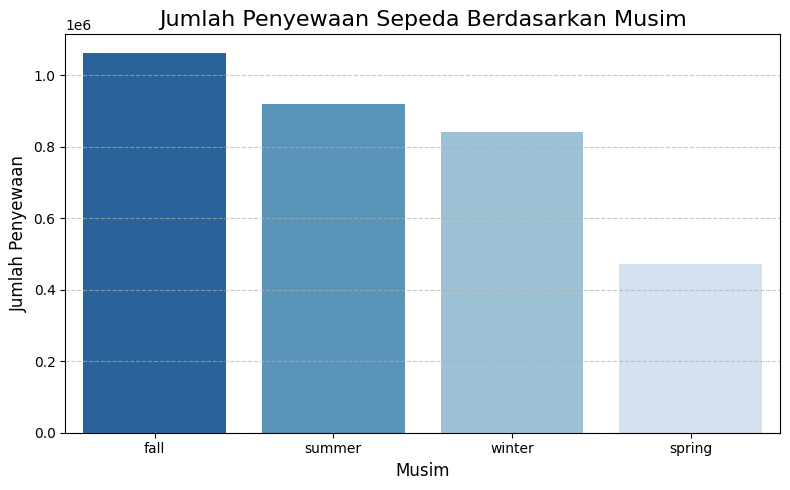

In [188]:

# Menghitung jumlah penyewaan berdasarkan season
seasonal_rentals = data_day.groupby('season')['cnt'].sum().sort_values(ascending=False)

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, palette="Blues_r")

# Menambahkan judul dan label
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()


dari grafik tersebut musim kita melihat jika sewa sepeda paling banyak ialah pada musim gugur, pada musim tersebut sangat sesuai melakukan promosi terkait sewa sepeda sehingga dapat meningkatkan jumlah penyewaan sepeda

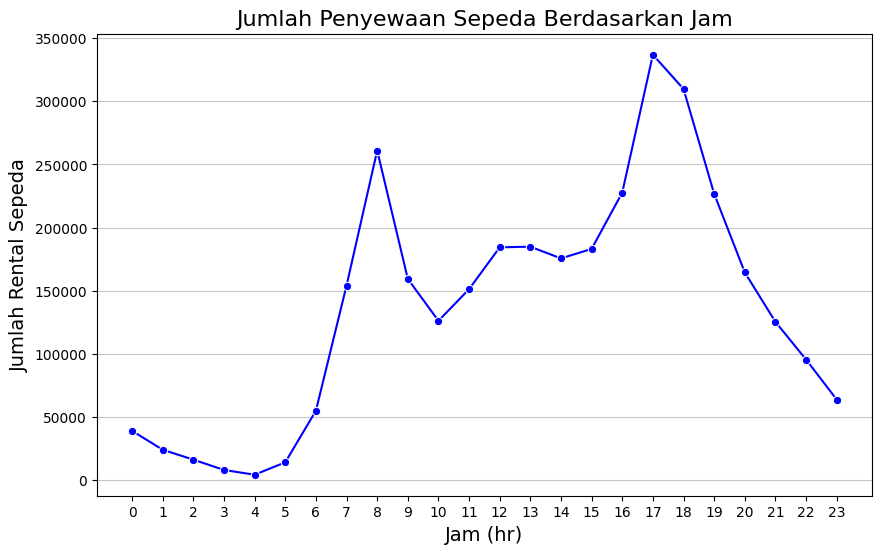

In [189]:
# Mengelompokkan data berdasarkan 'hr' dan menjumlahkan rental sepeda
hourly_rentals = data_hour.groupby("hr")["cnt"].sum().reset_index()

# Sortir berdasarkan jam untuk memastikan data terurut
hourly_rentals = hourly_rentals.sort_values("hr")

# Membuat grafik garis
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_rentals, x="hr", y="cnt", marker="o", color="b")

# Menambahkan judul dan label
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam", fontsize=16)
plt.xlabel("Jam (hr)", fontsize=14)
plt.ylabel("Jumlah Rental Sepeda", fontsize=14)
plt.xticks(hourly_rentals["hr"])  # Menampilkan semua label jam
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Menampilkan grafik
plt.show()


<ipython-input-190-304ae2d112a9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_rentals, x="holiday", y="cnt", palette="Blues_r")


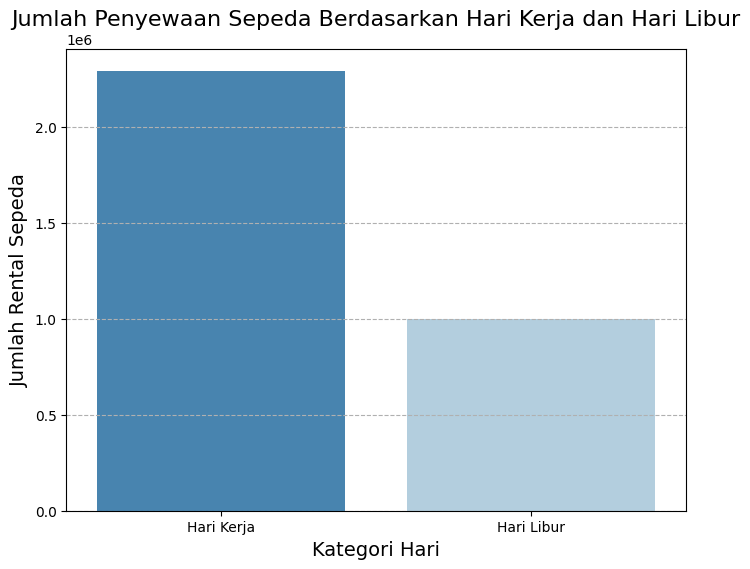

In [190]:
holiday_rentals = data_day.groupby('holiday')['cnt'].sum().reset_index()

# memberi label pada value di kolom holiday
holiday_rentals["holiday"] = holiday_rentals["holiday"].map({0: "Hari Kerja", 1: "Hari Libur"})

# Membuat grafik batang
plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_rentals, x="holiday", y="cnt", palette="Blues_r")

# Menambahkan judul dan label
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur", fontsize=16)
plt.xlabel("Kategori Hari", fontsize=14)
plt.ylabel("Jumlah Rental Sepeda", fontsize=14)
plt.grid(axis='y', linestyle='--')

# Menampilkan grafik
plt.show()

jika kita lihat secara detail, peningkatan penyewaan sepeda terjadi pada jam 07.00 - 08.00 yang mana dijam tersebut merupakan jam berangkat kerja, selain itu puncak penyewaan sepeda terjadi pada jam 17.00 - 18.00 yang mana pada jam tersebut merupakan jam kepulangan pekerja, hal ini menggambarkan bahwa rata-rata penyewaan sepeda terjadi saat jam" produktif yaitu dari jam 07.00 - 18.00. hipotesis tersebut juga didukung oleh data yang menunjukkan bahwa angka jumlah penyewaan sepeda di hari kerja jauh lebih banyak dari pada jumlah penyewaan sepeda di hari libur

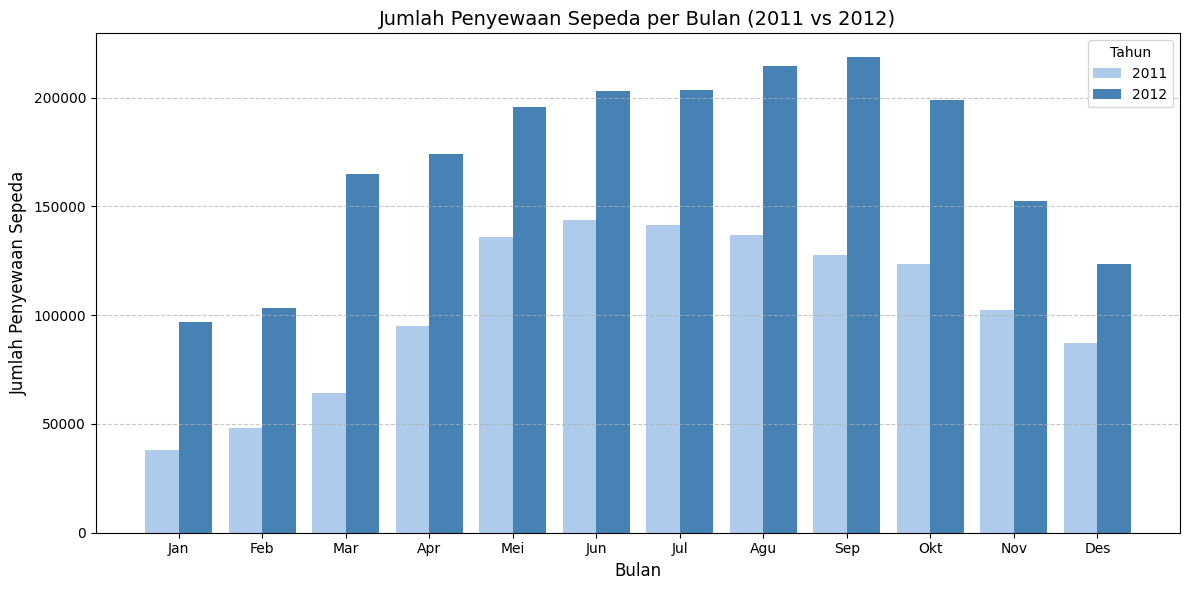

In [191]:
# Data grup berdasarkan tahun dan bulan
data_monthly = data_day.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Ubah angka tahun menjadi 2011 dan 2012 untuk lebih mudah dipahami
data_monthly['yr'] = data_monthly['yr'].replace({0: 2011, 1: 2012})

# Plot data
plt.figure(figsize=(12, 6))

# Plot batang untuk tahun 2011
plt.bar(data_monthly[data_monthly['yr'] == 2011]['mnth'] - 0.2,
        data_monthly[data_monthly['yr'] == 2011]['cnt'],
        width=0.4, label='2011', color='#AFCBEC')

# Plot batang untuk tahun 2012
plt.bar(data_monthly[data_monthly['yr'] == 2012]['mnth'] + 0.2,
        data_monthly[data_monthly['yr'] == 2012]['cnt'],
        width=0.4, label='2012', color='#4682B4')

# Tambahkan label dan judul
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.title('Jumlah Penyewaan Sepeda per Bulan (2011 vs 2012)', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.legend(title='Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.tight_layout()
plt.show()

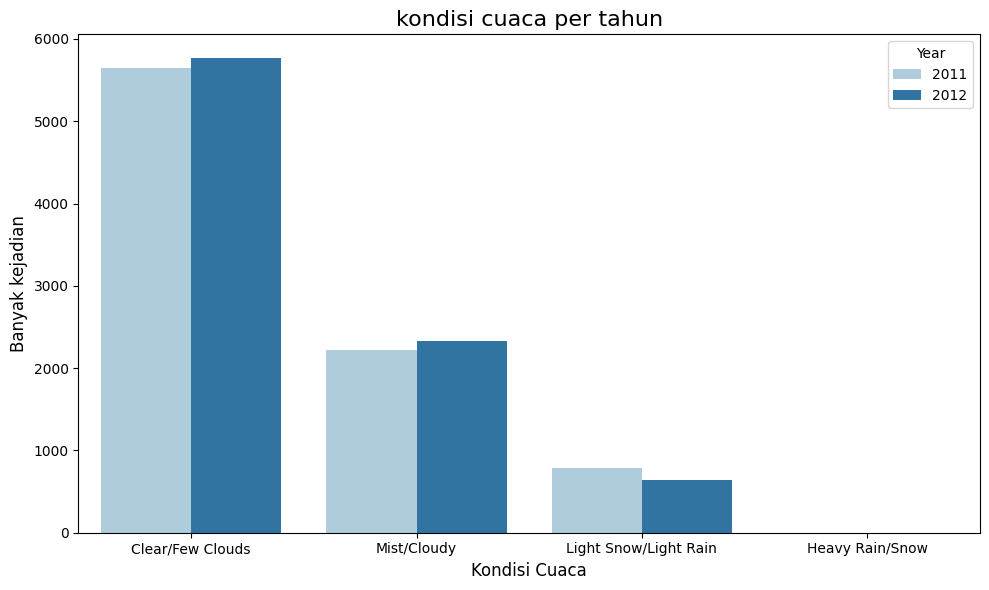

In [192]:
# Grupkan data berdasarkan tahun dan kondisi cuaca, lalu hitung total 'instant'
data_weather = data_hour.groupby(['yr', 'weathersit'])['instant'].count().reset_index()

# Ubah tahun menjadi 2011 dan 2012 untuk interpretasi lebih mudah
data_weather['yr'] = data_weather['yr'].replace({0: 2011, 1: 2012})

# Ganti nilai pada kolom 'weathersit' menjadi deskripsi
weather_labels = {
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain/Snow'
}
data_weather['weathersit'] = data_weather['weathersit'].replace(weather_labels)

# Visualisasi data dengan grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data_weather,
    x='weathersit',
    y='instant',
    hue='yr',
    palette='Paired'
)

# Tambahkan judul, label sumbu, dan legenda
plt.title("kondisi cuaca per tahun", fontsize=16)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Banyak kejadian", fontsize=12)
plt.xticks( fontsize=10)
plt.legend(title="Year", fontsize=10)

# Tampilkan grafik
plt.tight_layout()
plt.show()


terlihat bahwa penyewaan sepeda pada tahun 2012 meningkat secara signifikan dari tahun 2011, hal tersebut didasari oleh kondisi cuaca pada tahun 2012 lebih baik dari 2011. sehingga kondisi cuaca sangat berpengaruh terhadap jumlah penyewaan sepeda.

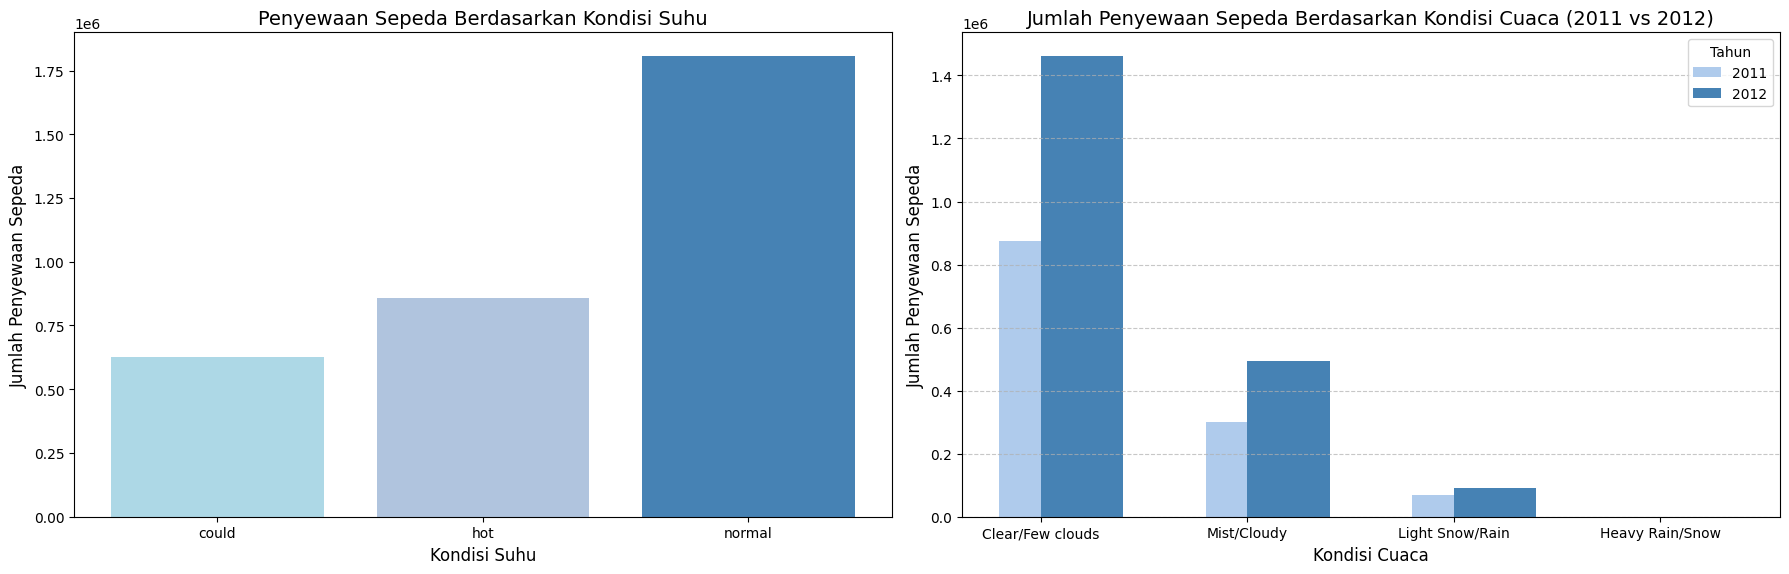

In [193]:
import matplotlib.pyplot as plt

# Grafik pertama: Bar chart untuk Penyewaan Sepeda Berdasarkan Kondisi Suhu
weather = data_hour.groupby('temperature status')['cnt'].sum().reset_index()
colors = ['#ADD8E6', '#B0C4DE', '#4682B4']

# Data kedua: Grup berdasarkan tahun dan kondisi cuaca
data_weather_cnt = data_hour.groupby(['yr', 'weathersit'])['cnt'].sum().reset_index()
data_weather_cnt['yr'] = data_weather_cnt['yr'].replace({0: 2011, 1: 2012})
weather_labels = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
data_weather_cnt['weathersit'] = data_weather_cnt['weathersit'].replace(weather_labels)

# Membuat subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Grafik 1: Penyewaan Sepeda Berdasarkan Kondisi Suhu
axs[0].bar(
    weather['temperature status'],
    weather['cnt'],
    color=colors
)
axs[0].set_title('Penyewaan Sepeda Berdasarkan Kondisi Suhu', fontsize=14)
axs[0].set_xlabel('Kondisi Suhu', fontsize=12)
axs[0].set_ylabel('Jumlah Penyewaan Sepeda', fontsize=12)

# Grafik 2: Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca (2011 vs 2012)
# Plot batang untuk tahun 2011
axs[1].bar(
    data_weather_cnt[data_weather_cnt['yr'] == 2011]['weathersit'],
    data_weather_cnt[data_weather_cnt['yr'] == 2011]['cnt'],
    width=0.4, label='2011', color='#AFCBEC', align='center'
)
# Plot batang untuk tahun 2012
axs[1].bar(
    data_weather_cnt[data_weather_cnt['yr'] == 2012]['weathersit'],
    data_weather_cnt[data_weather_cnt['yr'] == 2012]['cnt'],
    width=0.4, label='2012', color='#4682B4', align='edge'
)
axs[1].set_title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca (2011 vs 2012)', fontsize=14)
axs[1].set_xlabel('Kondisi Cuaca', fontsize=12)
axs[1].set_ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
axs[1].legend(title='Tahun')

# Tambahkan grid untuk grafik kedua
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Tata letak grafik
plt.tight_layout()

# Tampilkan kedua grafik
plt.show()



data tersebut menyimpulkan bahwa penyewaan sepeda tertinggi terjadi ketika cuaca cerah, sedangkan saat cuaca buruk tidak ada penyewaan sepeda terjadi.

In [194]:
data_hour.to_csv("hour_df.csv", index=False)

In [195]:
data_day.to_csv("day_df.csv", index=False)